In [7]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns

import shap

import joblib

In [8]:
df = pd.read_csv("../msd_processed.csv")

df.describe()

,year,popularity,duration,key,loudness,mode,tempo,signature
count,305723.000000,305723.000000,3.057230e+05,305723.000000,305723.000000,305723.000000,305723.000000,305723.000000
mean,8.441347,0.698198,2.457375e+05,5.313025,-9.285021,0.659924,122.445804,3.639275
std,0.931546,0.306963,1.099194e+05,3.594055,4.785959,0.473735,30.669523,1.177538
min,1.000000,0.003793,2.690160e+03,0.000000,-52.559000,0.000000,7.971000,1.000000
25%,8.000000,0.400075,1.859914e+05,2.000000,-11.633000,0.000000,99.482500,4.000000
50%,9.000000,0.866188,2.310265e+05,5.000000,-8.195000,1.000000,120.207000,4.000000
75%,9.000000,0.957209,2.843685e+05,9.000000,-5.850000,1.000000,142.668000,4.000000
max,9.000000,1.000000,3.007738e+06,11.000000,3.966000,1.000000,199.999000,7.000000


In [9]:
X = df[[
    'year',
    'duration',
    'key',
    'loudness',
    'mode',
    'tempo',
    'signature'
    ]]
y = df['popularity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
model = RandomForestRegressor(random_state=42)

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.014641760872658829
R^2 Score: 0.8451185602315225


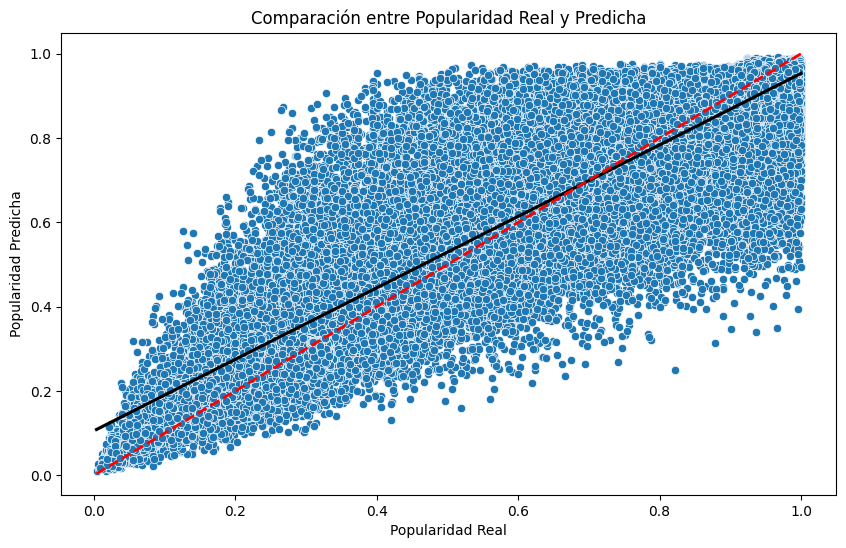

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
sns.regplot(x=y_test, y=y_pred, scatter=False, color='black', label='Regresión')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Popularidad Real')
plt.ylabel('Popularidad Predicha')
plt.title('Comparación entre Popularidad Real y Predicha')
plt.show()

In [12]:
# joblib.dump(model, '../MSD_RFR_PredictiveModel.pkl')

# joblib.dump(scaler, '../MSD_RFR_Scaler.pkl')

In [13]:
test = pd.DataFrame({
    "year": [2024],
    "duration": [274925],
    "key": [7],
    "loudness": [2.502],
    "mode": [0],
    "tempo": [134.082],
    "signature": [4],
})

test_scaled = scaler.transform(test)

pred = model.predict(test_scaled)

pred

array([0.89955745])

In [14]:
explainer = shap.TreeExplainer(model)

shap_values = explainer.shap_values(test_scaled)

shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, test_scaled)

In [15]:
shap_values

array([[ 0.01652886,  0.00669905,  0.01939057,  0.07201965,  0.02126536,
        -0.0173648 ,  0.08247782]])